In [1]:
# -*- coding: utf-8 -*-
from pylab import*
import matplotlib.pyplot as plt
from numpy import*
from matplotlib.pyplot import*
import pandas as pd
import time
import sys
from def_conv_crs_2h import*
from numpy import*
y_lbl=50
x_lbl =50


ers_bar = 1.3  # dimensione barre errore
pnt_dat = 6 # dimensione punti

title_s=35 #dimensione titolo bin

fit_l=3.  # dimensione linea fit


/home/zackmrc/Documenti/git_project/SIDIS pol/def_convolution_sidis_PV17


In [2]:
pwrlw = pd.read_csv('fit_parameters/fit_hadron_coef_0.25_chi_1.21__True_gk_ll_lgm.csv')
gauss = pd.read_csv('fit_parameters/fit_hadron_coef_0.25_chi_1.192__True_gk_ll_lgm.csv')

In [3]:
pwrlw

,NUP,NDO,NST,NSEA,AUP,ADO,AST,ASEA,BUP,BDO,BST,BSEA,PP,MSS,coef,chi_sq
0,0.099659,-0.106663,-0.115087,-0.057671,0.0,0.0,2.119515,0.0,3.50037,0.0,0.0,2.27198,3.015445,0.348702,0.25,1.21


In [4]:
pol = polarization(0.25)
pol.g_k = 'PV17'
pol.scale =10.58
pol.mass = 1.115
pol.bmax = 0.6
pol.charm = 'no'

pol.mdl_den = 'pwr_lw_star'
pol.mdl_num = 'gauss'

pol2 = polarization(0.25)
pol2.g_k = 'PV17'
pol2.scale =10.58
pol2.mass = 1.115
pol2.bmax = 0.6
pol2.charm = 'no'

pol2.mdl_den = 'pwr_lw_star'
pol2.mdl_num = 'pwr_lw_star'


In [5]:
f_prm=arange(0.,18.,1.)
f_prm[0] = gauss.NUP
f_prm[1] = gauss.NDO#par[0]  #do
f_prm[2] = gauss.NST  #par[0]      #st
f_prm[3] = gauss.NSEA  #par[0]      #upb
f_prm[4] = f_prm[3] #par[0]      #dob
f_prm[5] = f_prm[3] # par[0]      #stb
#¯¯¯¯¯¯
f_prm[6] = 0 #par[0]      #aup
f_prm[7] = 0 #par[0]      #ado
f_prm[8] = gauss.AST  # par[0]      #ast
f_prm[9] = 0# par[0]      #aupb
f_prm[10] = f_prm[9] #par[0]      #adob
f_prm[11] = f_prm[9] #par[0]      #astb
#¯#¯¯¯¯¯¯¯
f_prm[12] = gauss.BUP #par[0]      #bup
f_prm[13] = 0 #par[0]      #bdo
f_prm[14] = 0# par[0]      #bst
f_prm[15] = gauss.BSEA #par[0]      #bupb
f_prm[16] = f_prm[15] #par[0]      #bdob
f_prm[17] = f_prm[15] # par[0]      #bstb
pp = np.float64(gauss.PP)
#pp=gauss.PP.astype(float)



In [6]:
f_prm2=arange(0.,18.,1.)
f_prm2[0] = pwrlw.NUP
f_prm2[1] = pwrlw.NDO#par[0]  #do
f_prm2[2] = pwrlw.NST  #par[0]      #st
f_prm2[3] = pwrlw.NSEA  #par[0]      #upb
f_prm2[4] = f_prm[3] #par[0]      #dob
f_prm2[5] = f_prm[3] # par[0]      #stb
#¯¯¯¯¯¯
f_prm2[6] = 0 #par[0]      #aup
f_prm2[7] = 0 #par[0]      #ado
f_prm2[8] = pwrlw.AST  # par[0]      #ast
f_prm2[9] = 0# par[0]      #aupb
f_prm2[10] = f_prm[9] #par[0]      #adob
f_prm2[11] = f_prm[9] #par[0]      #astb
#¯#¯¯¯¯¯¯¯
f_prm2[12] = pwrlw.BUP #par[0]      #bup
f_prm2[13] = 0 #par[0]      #bdo
f_prm2[14] = 0# par[0]      #bst
f_prm2[15] = pwrlw.BSEA #par[0]      #bupb
f_prm2[16] = f_prm[15] #par[0]      #bdob
f_prm2[17] = f_prm[15] # par[0]      #bstb
pp2 = np.float64(pwrlw.PP)
mss = np.float64(pwrlw.MSS)
#pp=gauss.PP.astype(float)



In [7]:
pol.ratio('lbd','PP',0.3,0.1,f_prm,pp,0.)

0.018629033938437324

In [8]:
pol2.ratio('lbd','PP',0.3,0.1,f_prm2,pp2,mss)

0.017783833562232863

In [9]:
zs = linspace(0.25,0.7,30)

In [10]:
pls1=zeros(len(zs))
pls2=zeros(len(zs))

pls11=zeros(len(zs))
pls22=zeros(len(zs))

i=0
for zz in zs:
    pls1[i]= pol.ratio('lbd','PP',zz,0.3,f_prm,pp,0.)
    pls2[i]= pol2.ratio('lbd','PP',zz,0.3,f_prm2,pp2,mss)

    pls11[i]= pol.ratio('lbd_b','PP',zz,0.3,f_prm,pp,0.)
    pls22[i]= pol2.ratio('lbd_b','PP',zz,0.3,f_prm2,pp2,mss)

    i+=1

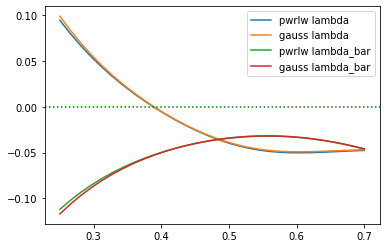

In [11]:
plot(zs,pls2,label='pwrlw lambda')
plot(zs,pls1,label='gauss lambda')
axhline(y = 0., color = 'g', linestyle = 'dotted')

plot(zs,pls22,label='pwrlw lambda_bar')
plot(zs,pls11,label='gauss lambda_bar')

legend()

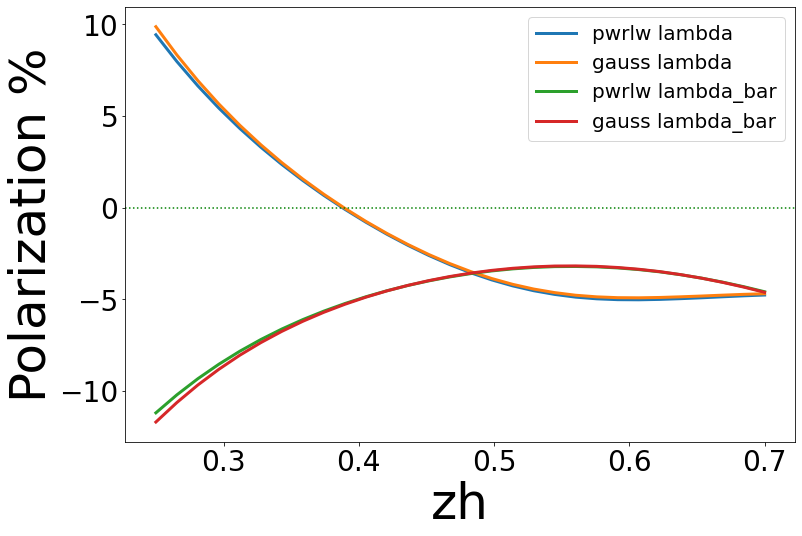

In [12]:
figure(figsize=(12, 8))
plot(zs,pls2*100,label='pwrlw lambda',linewidth=fit_l)
plot(zs,pls1*100,label='gauss lambda',linewidth=fit_l)

plot(zs,pls22*100,label='pwrlw lambda_bar',linewidth=fit_l)
plot(zs,pls11*100,label='gauss lambda_bar',linewidth=fit_l)

ylabel('Polarization %',size=y_lbl)
xlabel('zh',size=y_lbl)
#ylim(-10,35)
tick_params(axis='both', which='major', labelsize=28)
axhline(y = 0., color = 'g', linestyle = 'dotted')
legend(loc='upper right', fontsize=20,frameon=True)


In [13]:
pol.scale=10.58
pol2.scale=10.58


pls1=zeros(len(zs))
pls2=zeros(len(zs))

pls11=zeros(len(zs))
pls22=zeros(len(zs))

i=0
for zz in zs:
    pls1[i]= pol.ratio('lbd','PP',zz,0.3,f_prm,pp,0.)
    pls2[i]= pol2.ratio('lbd','PP',zz,0.3,f_prm2,pp2,mss)

    pls11[i]= pol.ratio('lbd_b','PP',zz,0.3,f_prm,pp,0.)
    pls22[i]= pol2.ratio('lbd_b','PP',zz,0.3,f_prm2,pp2,mss)

    i+=1

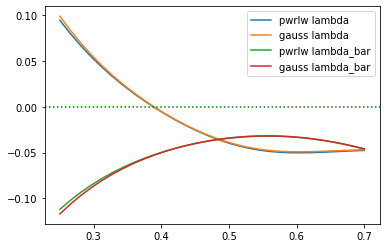

In [14]:
plot(zs,pls2,label='pwrlw lambda')
plot(zs,pls1,label='gauss lambda')
axhline(y = 0., color = 'g', linestyle = 'dotted')

plot(zs,pls22,label='pwrlw lambda_bar')
plot(zs,pls11,label='gauss lambda_bar')

legend()

In [15]:
pwrlw_ch_no = pd.read_csv('fit_parameters/fit_hadron_coef_0.25_chi_1.218__True_gk_ll_lgm.csv')
pwrlw_ch_yes = pd.read_csv('fit_parameters/fit_hadron_coef_0.25_chi_1.437__True_gk_ll_lgm.csv')

In [16]:
pwrlw_ch_no

,NUP,NDO,NST,NSEA,AUP,ADO,AST,ASEA,BUP,BDO,BST,BSEA,PP,MSS,coef,chi_sq
0,0.16542,-0.152615,-0.09244,-0.091276,0.0,0.0,0.686383,0.0,2.864056,0.0,0.0,1.056605,1.867813,0.246021,0.25,1.218


In [17]:
f_prm3=arange(0.,18.,1.)
f_prm3[0] = pwrlw_ch_no.NUP
f_prm3[1] = pwrlw_ch_no.NDO#par[0]  #do
f_prm3[2] = pwrlw_ch_no.NST  #par[0]      #st
f_prm3[3] = pwrlw_ch_no.NSEA  #par[0]      #upb
f_prm3[4] = f_prm[3] #par[0]      #dob
f_prm3[5] = f_prm[3] # par[0]      #stb
#¯¯¯¯¯¯
f_prm3[6] = 0 #par[0]      #aup
f_prm3[7] = 0 #par[0]      #ado
f_prm3[8] = pwrlw_ch_no.AST  # par[0]      #ast
f_prm3[9] = 0# par[0]      #aupb
f_prm3[10] = f_prm[9] #par[0]      #adob
f_prm3[11] = f_prm[9] #par[0]      #astb
#¯#¯¯¯¯¯¯¯
f_prm3[12] = pwrlw_ch_no.BUP #par[0]      #bup
f_prm3[13] = 0 #par[0]      #bdo
f_prm3[14] = 0# par[0]      #bst
f_prm3[15] = pwrlw_ch_no.BSEA #par[0]      #bupb
f_prm3[16] = f_prm[15] #par[0]      #bdob
f_prm3[17] = f_prm[15] # par[0]      #bstb
pp3 = np.float64(pwrlw_ch_no.PP)
mss3 =np.float64(pwrlw_ch_no.MSS)
#pp=gauss.PP.astype(float)



In [18]:
pwrlw_ch_yes

,NUP,NDO,NST,NSEA,AUP,ADO,AST,ASEA,BUP,BDO,BST,BSEA,PP,MSS,coef,chi_sq
0,0.222929,-0.159527,-0.203855,-0.17626,0.0,0.0,2.306557,0.0,2.444924,1.630131,0.058939,0.0,1.928847,0.308942,0.25,1.437


In [19]:
f_prm4=arange(0.,18.,1.)
f_prm4[0] = pwrlw_ch_no.NUP
f_prm4[1] = pwrlw_ch_no.NUP#par[0]  #do
f_prm4[2] = pwrlw_ch_no.NST  #par[0]      #st
f_prm4[3] = pwrlw_ch_no.NSEA  #par[0]      #upb
f_prm4[4] = pwrlw_ch_no.NSEA #par[0]      #dob
f_prm4[5] = pwrlw_ch_no.NDO # par[0]      #stb
#¯¯¯¯¯¯
f_prm4[6] = 0 #par[0]      #aup
f_prm4[7] = 0 #par[0]      #ado
f_prm4[8] = pwrlw_ch_no.AST  # par[0]      #ast
f_prm4[9] = 0# par[0]      #aupb
f_prm4[10] = 0. #par[0]      #adob
f_prm4[11] = 0.#par[0]      #astb
#¯#¯¯¯¯¯¯¯
f_prm4[12] = pwrlw_ch_no.BUP #par[0]      #bup
f_prm4[13] = pwrlw_ch_no.BUP     #bdo
f_prm4[14] = pwrlw_ch_no.BST     #bst
f_prm4[15] = 0. #par[0]      #bupb
f_prm4[16] = 0. #par[0]      #bdob
f_prm4[17] = pwrlw_ch_no.BDO  # par[0]     
#bstb
pp4 = np.float64(pwrlw_ch_no.PP)
mss4 =np.float64(pwrlw_ch_no.MSS)
#pp=gauss.PP.astype(float)



In [20]:
pol = polarization(0.25)
pol.g_k = 'PV17'
pol.scale =10.58
pol.mass = 1.115
pol.bmax = 0.6
pol.charm = 'yes'

pol.mdl_den = 'pwr_lw_star'
pol.mdl_num = 'pwr_lw_star'

pol2 = polarization(0.25)
pol2.g_k = 'PV17'
pol2.scale =10.58
pol2.mass = 1.115
pol2.bmax = 0.6
pol2.charm = 'yes'

pol2.mdl_den = 'pwr_lw_star'
pol2.mdl_num = 'pwr_lw_star'


In [21]:
xb = 0.1## Valore x_bjorken

In [22]:
pls3=zeros(len(zs))
pls4=zeros(len(zs))

pls33=zeros(len(zs))
pls44=zeros(len(zs))

i=0
for zz in zs:
    pls3[i]= pol.ratio('lbd','PP',zz,xb,f_prm3,pp3,mss3)
    pls4[i]= pol2.ratio('lbd','PP',zz,xb,f_prm4,pp2,mss4)

    pls33[i]= pol.ratio('lbd_b','PP',zz,xb,f_prm3,pp3,mss3)
    pls44[i]= pol2.ratio('lbd_b','PP',zz,xb,f_prm4,pp4,mss4)

    i+=1

In [23]:
pol.scale=10.58
pol2.scale=10.58


pls1=zeros(len(zs))
pls2=zeros(len(zs))

pls11=zeros(len(zs))
pls22=zeros(len(zs))

i=0
for zz in zs:
    pls1[i]= pol.ratio('lbd','PP',zz,xb,f_prm,pp,0.)
    pls2[i]= pol2.ratio('lbd','PP',zz,xb,f_prm2,pp2,mss)

    pls11[i]= pol.ratio('lbd_b','PP',zz,xb,f_prm,pp,0.)
    pls22[i]= pol2.ratio('lbd_b','PP',zz,xb,f_prm2,pp2,mss)

    i+=1

/home/zackmrc/Documenti/git_project/SIDIS pol/def_convolution_sidis_PV17/model_fct.py:86: RuntimeWarning: divide by zero encountered in double_scalars
  mm1 = gmm*bssl1*(b_new*mass)**(pwr-1)		 # modified Bessel function of the second kind
/home/zackmrc/Documenti/git_project/SIDIS pol/def_convolution_sidis_PV17/def_conv_crs_2h.py:155: RuntimeWarning: invalid value encountered in double_scalars
  elif self.mdl_num == 'pwr_lw_star' : res = res*mdl1.MD_bstar(btt,wdt_pol,z1,xb2,mss)
/home/zackmrc/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:2214: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/home/zackmrc/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/zackmrc/Documenti/git_project/SIDIS pol/def_convolution_sidis_PV17/model_fct.py:86: RuntimeWarning: divide by zero encountered in power
  mm1 = gmm*bssl1*(b_new*ma

In [24]:
y_lbl=50
x_lbl =50
ers_bar = 2.  # dimensione barre errore
pnt_dat = 9 # dimensione punti

title_s=35 #dimensione titolo bin

fit_l=3.  # dimensione

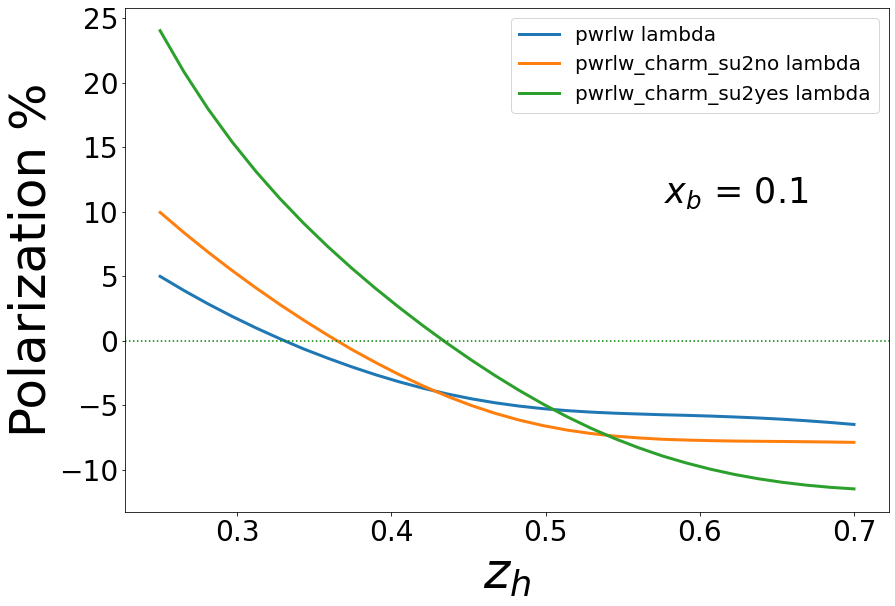

In [25]:
fig1, ax = plt.subplots()
plot(zs,pls2*100,label='pwrlw lambda',linewidth=fit_l)
plot(zs,pls3*100,label='pwrlw_charm_su2no lambda',linewidth=fit_l)
plot(zs,pls4*100,label='pwrlw_charm_su2yes lambda',linewidth=fit_l)
ylabel('Polarization %',size=y_lbl)
xlabel('$z_h$',size=y_lbl)
title('$x_b$ = '+ str(xb),fontsize=title_s,x=0.8, y=0.6) 

#ylim(-10,35)
tick_params(axis='both', which='major', labelsize=28)
axhline(y = 0., color = 'g', linestyle = 'dotted')
legend(loc='upper right',bbox_to_anchor=(1.,1.), fontsize=20,frameon=True)
fig1.subplots_adjust(top=0.9,bottom=0.2,left=0.230,right=0.76,hspace=0.,wspace=0.)

fig1.set_size_inches(20., 10., forward=True)
fig1.savefig('pol_sidis_lambda_xb_'+str(xb)+'.pdf')


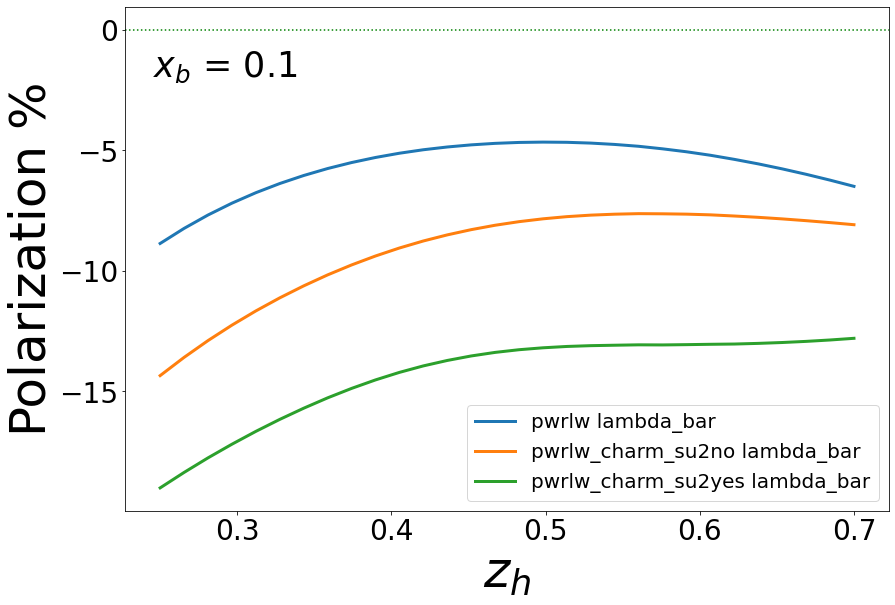

In [26]:
fig1, ax = plt.subplots()

plot(zs,pls22*100,label='pwrlw lambda_bar',linewidth=fit_l)
plot(zs,pls33*100,label='pwrlw_charm_su2no lambda_bar',linewidth=fit_l)
plot(zs,pls44*100,label='pwrlw_charm_su2yes lambda_bar',linewidth=fit_l)
ylabel('Polarization %',size=y_lbl)
xlabel('$z_h$',size=y_lbl)
title('$x_b$ = '+ str(xb),fontsize=title_s,x=0.13, y=0.85) 

#ylim(-10,35)
tick_params(axis='both', which='major', labelsize=28)
axhline(y = 0., color = 'g', linestyle = 'dotted')
legend(loc='lower right', fontsize=20,frameon=True)
fig1.subplots_adjust(top=0.9,bottom=0.2,left=0.230,right=0.76,hspace=0.,wspace=0.)

fig1.set_size_inches(20., 10., forward=True)
fig1.savefig('pol_sidis_lambda_bar_xb_'+str(xb)+'.pdf')